# Twitter sentiment analysis using textblob classifier
https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

In [1]:
#Importing our libraries
#General
import pandas as pd    #To handle data
import numpy as np     #for number computing
import tweepy          #to consume twitter's API


#For plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Creating a Twitter App
we need to access to our Twitter account and create an app. https://apps.twitter.com/
   

In [2]:
#Import  credentials.py to use twitter API
#It should be python file (credentials.py)

from credentials import *

#API's setup
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    
    #Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    #Return API with authentication:
    api = tweepy.API(auth)
    return api




#Tweets extraction
for extraction we will choose @modi

In [3]:
#We create an extractor object:
extractor = twitter_setup()

#We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name = "Samsung On7 Pro", count = 150)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

#we print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)


Number of tweets extracted: 98.

5 recent tweets:

RT @caricatured: #Cartoon #Modi #Silence https://t.co/Uibo4NC6C8
RT @pkdhariwal: We want justice...... we want cbi enquiry........ #SSCExamScam #cbi4ssc #naukri_ke_dalal #sscscam #modi #RahulGandhi #Annah…
RT @gopidas: Morons like this onr below is going to ensure #Modi 's downfall in 2019 https://t.co/m1xdVv7kOX
RT @Shyam17: Deep Peep into d #caste curse in #HinduReligion &amp; its origin.#AdiSankara,#Harijan,#Girijan,#KanchaIlliah,#BJP,#Modi.https://t.…
RT @Rababsworld: @lawliga @MaryamNSharif دیکھو #نواز_شریف کی کیا حالت ہے جب کہ وہ #modi کا اثاثہ تھا ہندوستان نے #نواز_شریف پر بہت انویسٹ ک…


In [4]:
#Creating a (pandas) DataFrame
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @caricatured: #Cartoon #Modi #Silence https...
1,RT @pkdhariwal: We want justice...... we want ...
2,RT @gopidas: Morons like this onr below is goi...
3,RT @Shyam17: Deep Peep into d #caste curse in ...
4,RT @Rababsworld: @lawliga @MaryamNSharif دیکھو...
5,"RT @rajneesh350: #Modi जी ने कहा रात है,\nटीवी..."
6,RT @techactivein: डिजिटल इंडिया क्या है? इसका ...
7,RT @rahulkrrao: डिजिटल इंडिया क्या है? इसका क्...
8,RT @trollsangh: തുറിച്ചു നോക്കണ്ട \nഎഴുതാത്ത പ...
9,RT @Arunthakurs: #Delhi \nबड़ा घर नहीं लेंगे ...


In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [6]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

969903862491463680
2018-03-03 11:54:35
FunwithTechnology
0
806
None
None
{'hashtags': [{'text': 'Cartoon', 'indices': [17, 25]}, {'text': 'Modi', 'indices': [26, 31]}, {'text': 'Silence', 'indices': [32, 40]}], 'symbols': [], 'user_mentions': [{'screen_name': 'caricatured', 'name': 'alok nirantar', 'id': 62080004, 'id_str': '62080004', 'indices': [3, 15]}], 'urls': [], 'media': [{'id': 965860603796557825, 'id_str': '965860603796557825', 'indices': [41, 64], 'media_url': 'http://pbs.twimg.com/media/DWdtGg_WkAEXukU.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DWdtGg_WkAEXukU.jpg', 'url': 'https://t.co/Uibo4NC6C8', 'display_url': 'pic.twitter.com/Uibo4NC6C8', 'expanded_url': 'https://twitter.com/caricatured/status/965860754262863872/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1446, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 848, 'resize': 'fit'}, 'small': {'w': 680, 'h': 480, 'resize': 'fit'}}, 'source_status_i

# Adding relevant info to our dataframe
As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. 

In [7]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
# Display of first 10 elements from dataframe:
display(data.head(4))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @caricatured: #Cartoon #Modi #Silence https...,64,969903862491463680,2018-03-03 11:54:35,FunwithTechnology,0,806
1,RT @pkdhariwal: We want justice...... we want ...,140,969903594567643136,2018-03-03 11:53:31,FunwithTechnology,0,15
2,RT @gopidas: Morons like this onr below is goi...,108,969903457011290112,2018-03-03 11:52:58,FunwithTechnology,0,1
3,RT @Shyam17: Deep Peep into d #caste curse in ...,144,969903428594933765,2018-03-03 11:52:51,FunwithTechnology,0,1


Now that we have extracted and have the data in a easy-to-handle ordered way, we're ready to do a bit more of manipulation to visualize some plots and gather some statistical data. The first part of the post is done.

#Visualization and basic statistics
#Average and popularity
We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

In [9]:
#We extract the mean of lengths:
mean = np.mean(data['len'])

print("The length's average in tweets: {}", format(mean))



The length's average in tweets: {} 119.12244897959184


#To extract more data, we will use some pandas' functionalities:

In [10]:
#we extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

#max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))





The tweet with more likes is: 
Fun, simple way to get Free Talktime. Check out  https://t.co/PxUFVaEURb via @Laaptu_com
Number of likes: 1
88 characters.

The tweet with more retweets is: 
RT @caricatured: #Cartoon #Modi #Silence https://t.co/Uibo4NC6C8
Number of retweets: 806
64 characters.



#Time Series
Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

In [11]:
#We create time series for data:
tlen = pd.Series(data = data['len'].values, index = data['Date'])
tfav = pd.Series(data = data['Likes'].values, index = data['Date'])
tret = pd.Series(data = data['RTs'].values, index = data['Date'])


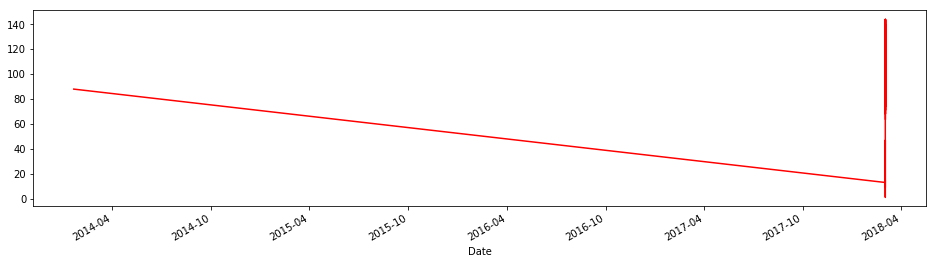

In [12]:
#lets plot the time series
tlen.plot(figsize = (16,4), color = 'r')

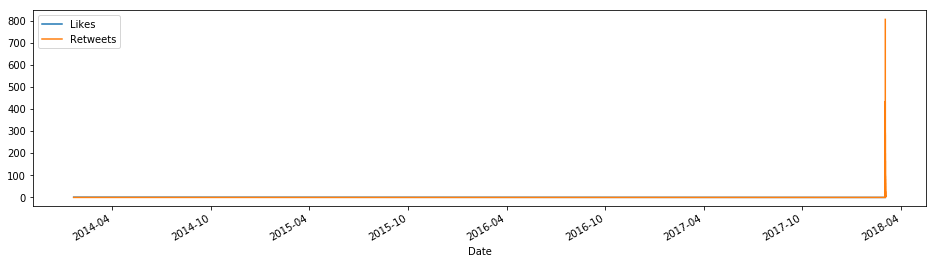

In [13]:
#Like Vs retweets visualization:
tfav.plot(figsize = (16,4), label = "Likes", legend = True)
tret.plot(figsize = (16,4), label = "Retweets", legend = True);  


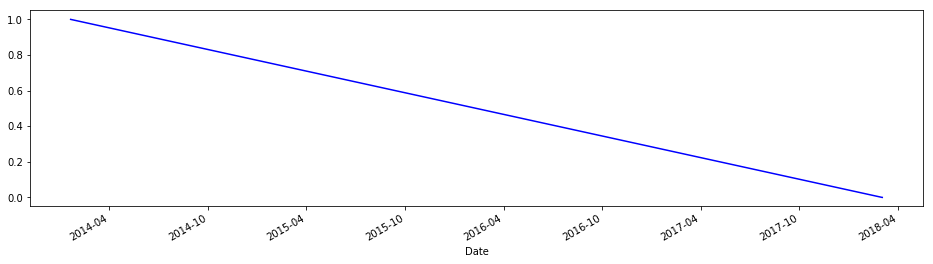

In [14]:
#this is India meri jaan, yaha twitter pe Likes se jada Retweets hote hai, 
#So we will do seperate visualization
tfav.plot(figsize = (16, 4), color ='b')


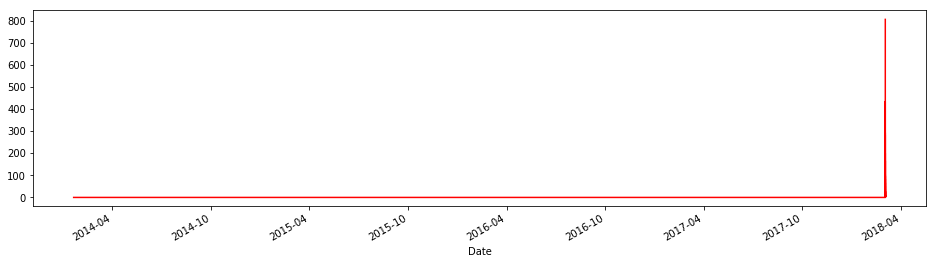

In [15]:
tret.plot(figsize = (16,4), color = 'r')

Observation: some of the tweets has very high popularity for likes and Retweets.

#Pie charts of sources
Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source (😱🤔). We first clean all the sources:

In [16]:
#We obtain all possible sources and how many times it used:
sources = {"Twitter for Android" : 0}
for source in data['Source']:
    if source in sources:
        sources[source] += 1
    else:
        sources[source] = 1

#We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source),sources[source])
    

Creation of content sources:
* Twitter for Android 0
* FunwithTechnology 96
* Twitter Web Client 1
* Twitter for Websites 1


([<matplotlib.patches.Wedge at 0x7fd33d5bc3c8>,
 [Text(6.73556e-17,1.1,'Twitter for Android'),
  Text(-0.0704772,-1.09774,'FunwithTechnology'),
  Text(0.105625,1.09492,'Twitter Web Client'),
  Text(0.0352567,1.09943,'Twitter for Websites')],
 [Text(3.67394e-17,0.6,'0.00'),
  Text(-0.0384421,-0.598767,'97.96'),
  Text(0.0576138,0.597227,'1.02'),
  Text(0.0192309,0.599692,'1.02')])

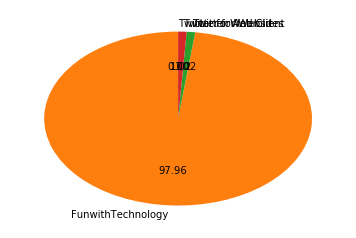

In [17]:
#pie chart:
figureObject, axesObject = plt.subplots()


# Draw the pie chart

axesObject.pie(list(sources.values()),

        labels= list(sources.keys()),

        autopct='%1.2f',

        startangle= 90)

# Sentiment analysis

# Importing textblob
textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. 

In [18]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    """
    Utility function to clean the text in a tweet by
    removing links and special characters using regex.
    """
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)", " ", tweet).split())

def analize_sentiment(tweet):
    """
    Utility function to classify the polarity of a tweet
    using textblob.
    """
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

    
    

The way it works is that textblob already provides a trained analyzer (cool, right?). Textblob can work with different machine learning models used in natural language processing. 

In [19]:
#We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets']])

#We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @caricatured: #Cartoon #Modi #Silence https...,64,969903862491463680,2018-03-03 11:54:35,FunwithTechnology,0,806,0
1,RT @pkdhariwal: We want justice...... we want ...,140,969903594567643136,2018-03-03 11:53:31,FunwithTechnology,0,15,0
2,RT @gopidas: Morons like this onr below is goi...,108,969903457011290112,2018-03-03 11:52:58,FunwithTechnology,0,1,-1
3,RT @Shyam17: Deep Peep into d #caste curse in ...,144,969903428594933765,2018-03-03 11:52:51,FunwithTechnology,0,1,0
4,RT @Rababsworld: @lawliga @MaryamNSharif دیکھو...,140,969903320897765376,2018-03-03 11:52:26,FunwithTechnology,0,1,0
5,"RT @rajneesh350: #Modi जी ने कहा रात है,\nटीवी...",140,969903263410630656,2018-03-03 11:52:12,FunwithTechnology,0,96,0
6,RT @techactivein: डिजिटल इंडिया क्या है? इसका ...,121,969903153616318464,2018-03-03 11:51:46,FunwithTechnology,0,1,0
7,RT @rahulkrrao: डिजिटल इंडिया क्या है? इसका क्...,119,969903124646260737,2018-03-03 11:51:39,FunwithTechnology,0,1,0
8,RT @trollsangh: തുറിച്ചു നോക്കണ്ട \nഎഴുതാത്ത പ...,140,969903043905908736,2018-03-03 11:51:20,FunwithTechnology,0,9,0
9,RT @Arunthakurs: #Delhi \nबड़ा घर नहीं लेंगे ...,140,969902960263118848,2018-03-03 11:51:00,FunwithTechnology,0,2,0


In [20]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [21]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 26.53061224489796%
Percentage of neutral tweets: 64.28571428571429%
Percentage de negative tweets: 9.183673469387756%
